## Load in Data

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

df = pd.read_csv("training.1600000.processed.noemoticon.csv",encoding="ISO-8859-1",names=["target", "ids", "date", "flag", "user", "text"])
df.head()

,target,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


## EDA

In [5]:
# df.polarity.value_counts()
df.groupby("target").size()

target
0    800000
4    800000
dtype: int64

In [23]:
from datetime import datetime
from datetime import timedelta

def time_transform (x):
  x = x.replace("PDT", "UTC")
  return datetime.strptime(x, "%a %b %d %H:%M:%S %Z %Y") - timedelta(hours=7)

In [24]:
time_transform(df["date"][0])

datetime.datetime(2009, 4, 6, 15, 19, 45)

In [25]:
df["time"] = df["date"].apply(time_transform)

In [28]:
import matplotlib.pyplot as plt


(array([733512., 733528., 733542., 733559., 733573.]),
 <a list of 5 Text major ticklabel objects>)

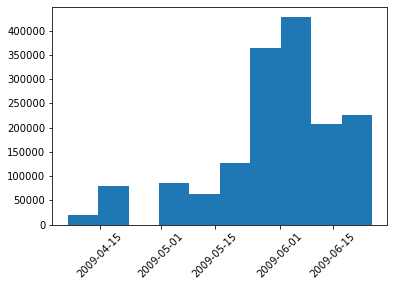

In [30]:
plt.hist(df["time"])
plt.xticks(rotation = 45)

In [31]:
print(df["time"].min())
print(df["time"].max())

2009-04-06 15:19:45
2009-06-25 03:28:31


In [6]:
df["text"].apply(len).mean()

74.09011125

In [34]:
from collections import Counter
most_common_words = Counter(" ".join(df["text"]).split()).most_common(25)
most_common_words

[('to', 552962),
 ('I', 496619),
 ('the', 487501),
 ('a', 366212),
 ('my', 280025),
 ('and', 275263),
 ('i', 250016),
 ('is', 217693),
 ('you', 213871),
 ('for', 209801),
 ('in', 202294),
 ('of', 179554),
 ('it', 171812),
 ('on', 154365),
 ('have', 132249),
 ('so', 125155),
 ('me', 122509),
 ('that', 118685),
 ('with', 110843),
 ('be', 108069),
 ('but', 106272),
 ('at', 102196),
 ("I'm", 99559),
 ('was', 99140),
 ('just', 96284)]

In [36]:
df["user"].mode()

0    lost_dog
dtype: object

In [37]:
df[df["user"] == "lost_dog"]

,target,ids,date,flag,user,text,time
43935,0,1676704158,Fri May 01 22:54:02 PDT 2009,NO_QUERY,lost_dog,@NyleW I am lost. Please help me find a good h...,2009-05-01 15:54:02
45574,0,1677189389,Sat May 02 00:51:35 PDT 2009,NO_QUERY,lost_dog,@SallyD I am lost. Please help me find a good ...,2009-05-01 17:51:35
46919,0,1677519173,Sat May 02 02:30:50 PDT 2009,NO_QUERY,lost_dog,@zuppaholic I am lost. Please help me find a g...,2009-05-01 19:30:50
47949,0,1677752995,Sat May 02 03:47:51 PDT 2009,NO_QUERY,lost_dog,@LOSTPETUSA I am lost. Please help me find a g...,2009-05-01 20:47:51
50572,0,1678544903,Sat May 02 07:02:28 PDT 2009,NO_QUERY,lost_dog,@JeanLevertHood I am lost. Please help me find...,2009-05-02 00:02:28
...,...,...,...,...,...,...,...
792409,0,2326272045,Thu Jun 25 06:48:18 PDT 2009,NO_QUERY,lost_dog,@trooppetrie I am lost. Please help me find a ...,2009-06-24 23:48:18
793314,0,2326588770,Thu Jun 25 07:14:42 PDT 2009,NO_QUERY,lost_dog,@Carly_FTS I am lost. Please help me find a go...,2009-06-25 00:14:42
793610,0,2326689658,Thu Jun 25 07:22:51 PDT 2009,NO_QUERY,lost_dog,@inathlone I am lost. Please help me find a go...,2009-06-25 00:22:51
798608,0,2328636087,Thu Jun 25 09:49:04 PDT 2009,NO_QUERY,lost_dog,@Kram I am lost. Please help me find a good ho...,2009-06-25 02:49:04


## Using Pretrained Model

In [ ]:
import nltk
nltk.download('vader_lexicon')

In [38]:
from nltk.sentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()


In [39]:
sia.polarity_scores("i hate hate hate hate hate hate hate")["compound"]

-0.9796

In [40]:
df["sentiment_score"] = df["text"].apply(lambda x: sia.polarity_scores(x)["compound"])
df["sentiment"] = np.select([df["sentiment_score"] < 0, df["sentiment_score"] == 0, df["sentiment_score"] > 0],
                           ['neg', 'neu', 'pos'])

In [41]:
pd.set_option('display.max_colwidth', None)
df["text"][df["sentiment_score"] == df["sentiment_score"].min()]

404662    Shit shit shit shit shit shit shit shit shit  shit shit shit shit shit shit shit shit shit shit shit shit shit shit shit shit shit shit  .
Name: text, dtype: object

In [42]:
df["true_sentiment"] = np.select([df["target"] == 0 ,df["target"] == 4], ['neg', 'pos'])

In [45]:
df.head()

,target,ids,date,flag,user,text,time,sentiment_score,sentiment,true_sentiment
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D",2009-04-06 15:19:45,-0.0173,neg,neg
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by texting it... and might cry as a result School today also. Blah!,2009-04-06 15:19:49,-0.7500,neg,neg
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Managed to save 50% The rest go out of bounds,2009-04-06 15:19:53,0.4939,pos,neg
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,2009-04-06 15:19:57,-0.2500,neg,neg
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all. i'm mad. why am i here? because I can't see you all over there.",2009-04-06 15:19:57,-0.6597,neg,neg


In [50]:

num_correct = df[df["true_sentiment"] == df["sentiment"]].shape[0] #use shape not count
total = df.shape[0]
accuracy_score = num_correct / total
accuracy_score

0.521004375